<a href="https://colab.research.google.com/github/seuha516/MachineLearningPractice/blob/main/SortAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#다양한 **분류 알고리즘**

## KNeighborsClassfier

###Data

In [81]:
import pandas as pd
import numpy as np
fish=pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [82]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [83]:
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target=fish['Species'].to_numpy()
print(fish_input[:5])
print(fish_target[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


### Train_Test_Split

In [84]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)

In [85]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

###Test

In [86]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


In [87]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [88]:
print(kn.predict(test_scaled[:5]))
print(test_target[:5])

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


In [89]:
proba=kn.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [90]:
print(test_scaled[3:4])
distances,indexes=kn.kneighbors(test_scaled[3:4])
print(distances)
print(train_target[indexes])

[[-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]]
[[0.20774583 0.24862983 0.33682411]]
[['Roach' 'Perch' 'Perch']]


##Logistic Regression

###Sigmoid Function

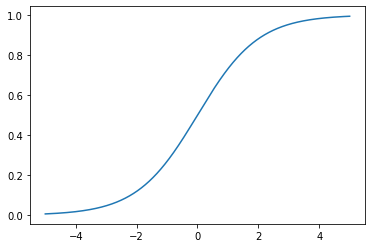

In [91]:
import matplotlib.pyplot as plt
z=np.arange(-5,5,0.001)
phi=1/(1+np.exp(-z))
plt.plot(z,phi)
plt.show()

###BreamAndSmelt

In [92]:
bream_smelt_indexes=(train_target=='Bream')|(train_target=='Smelt')
train_bream_smelt=train_scaled[bream_smelt_indexes]
target_bream_smelt=train_target[bream_smelt_indexes]

In [93]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [94]:
print(lr.coef_,lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [95]:
decisions=lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [96]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


###Multiclass Classification

In [97]:
lr=LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [98]:
print(lr.classes_)

proba=lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=3))
print(lr.predict(test_scaled[:5]))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [99]:
decision=lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [100]:
from scipy.special import softmax
proba=softmax(decision,axis=1)
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


##Stochastic Gradient Descent

###Data

In [113]:
fish=pd.read_csv('https://bit.ly/fish_csv')

fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target=fish['Species'].to_numpy()

train_input,test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)

ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

###SGDClassfier

In [114]:
from sklearn.linear_model import SGDClassifier
sc=SGDClassifier(loss='log',max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [115]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.825


###Early Stopping

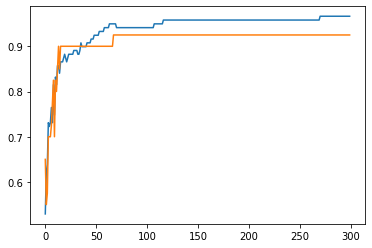

In [116]:
sc=SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]
classes=np.unique(train_target)

for _ in range(0,300):
  sc.partial_fit(train_scaled,train_target,classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [117]:
#에포크 횟수: 100
sc=SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


###Hinge Loss

In [118]:
sc=SGDClassifier(loss='hinge',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9495798319327731
0.925
